In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline


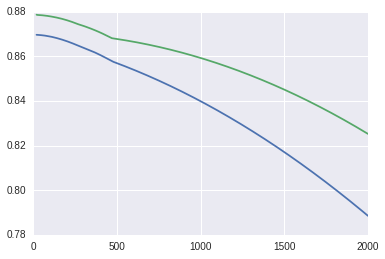

In [29]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y=data['Balance']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

alpha=np.linspace(20,2000,10000)
score=np.zeros([2,len(alpha)])
betas=np.zeros([7,len(alpha)])
betasnorm=np.zeros([7,len(alpha)])
scorenorm=np.zeros([2,len(alpha)])
for i in range(0,len(alpha)):
    clf= linear_model.Lasso(alpha=alpha[i])
    clf.fit(X_train,Y_train)
    betas[1:,i]=clf.coef_
    betas[0,i]=clf.intercept_
    score[0,i]=clf.score(X_test,Y_test)
    score[1,i]=clf.score(X_train,Y_train)
    scaler = preprocessing.StandardScaler().fit(X_test)

X_=scaler.transform(X)
for i in range(0,len(alpha)):
    scaler = preprocessing.StandardScaler().fit(X)
    X_test=scaler.transform(X_test)
    clf.fit(X_train,Y_train)
    betasnorm[1:,i]=clf.coef_
    betasnorm[0,i]=clf.intercept_
    scorenorm[0,i]=clf.score(X_test,Y_test)
    scorenorm[1,i]=clf.score(X_test,Y_test)
    
plt.plot(alpha,score[0,:])
plt.plot(alpha,score[1,:])
plt.show()

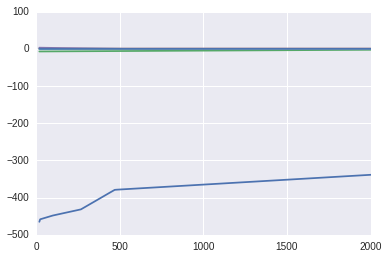

In [27]:
for j in range(0,7):
    plt.plot(alpha,betas[j,:])

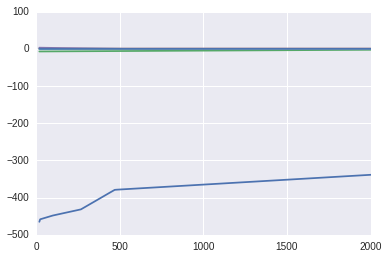

In [28]:
for j in range(0,7):
    plt.plot(alpha,betasnorm[j,:])